# 11) 다중회귀분석

In [1]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


In [2]:
df.columns

Index(['Month', 'Day', 'Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [3]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df[["Ozone"]]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
import numpy as np

X_train = np.array(X_train_scaled,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)

X_test = np.array(X_test_scaled,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [7]:
import torch

inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

In [8]:
import torch.nn as nn

input_dim = X_train.shape[1]
output_dim = 64  

model = nn.Sequential(
    nn.Linear(input_dim,24),
    nn.ReLU(),
    nn.Linear(24,12),
    nn.ReLU(),
    nn.Linear(12,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

print(model)
print(model[6].weight)
print(model[6].bias)

Sequential(
  (0): Linear(in_features=3, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.1358, -0.4889,  0.0688]], requires_grad=True)
Parameter containing:
tensor([-0.3799], requires_grad=True)


In [9]:
mse = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

loss_list = []

iteration_number = 5000

for iteration in range(iteration_number):
    optimizer.zero_grad()
    
    results = model(inputs)  
    loss = mse(results, targets)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)

    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 2970.609619140625
epoch 50, loss 571.0704956054688
epoch 100, loss 386.219482421875
epoch 150, loss 377.79833984375
epoch 200, loss 372.8202209472656
epoch 250, loss 367.4120788574219
epoch 300, loss 361.6659851074219
epoch 350, loss 356.99664306640625
epoch 400, loss 352.44427490234375
epoch 450, loss 346.6820983886719
epoch 500, loss 342.36248779296875
epoch 550, loss 338.7392883300781
epoch 600, loss 335.18896484375
epoch 650, loss 329.3977355957031
epoch 700, loss 320.3724365234375
epoch 750, loss 305.8160705566406
epoch 800, loss 282.3365783691406
epoch 850, loss 246.11660766601562
epoch 900, loss 208.97640991210938
epoch 950, loss 188.84429931640625
epoch 1000, loss 174.93165588378906
epoch 1050, loss 159.778564453125
epoch 1100, loss 142.892822265625
epoch 1150, loss 130.97914123535156
epoch 1200, loss 122.62419891357422
epoch 1250, loss 116.64317321777344
epoch 1300, loss 111.0113754272461
epoch 1350, loss 104.36392211914062
epoch 1400, loss 99.09674072265625
epoc

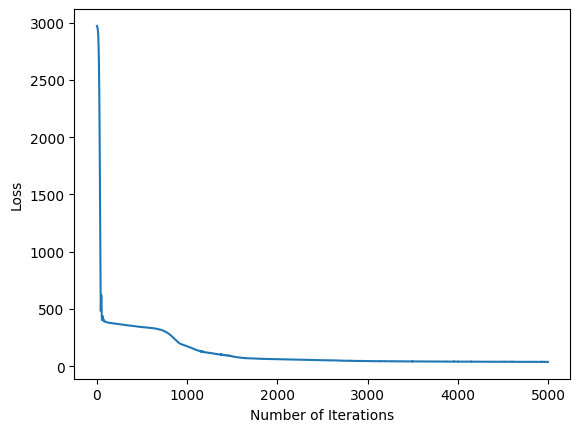

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [11]:
input_x_test = torch.from_numpy(X_test)

predicted = model(input_x_test.float()).data.numpy()

predicted[0:5]

array([[ 71.004875],
       [ 65.03184 ],
       [ 47.22779 ],
       [101.4439  ],
       [ 16.726023]], dtype=float32)

In [12]:
loss.data.item() # mse

38.49951171875

In [13]:
np.sqrt(loss.data.item()) # rmse

6.204797476046257

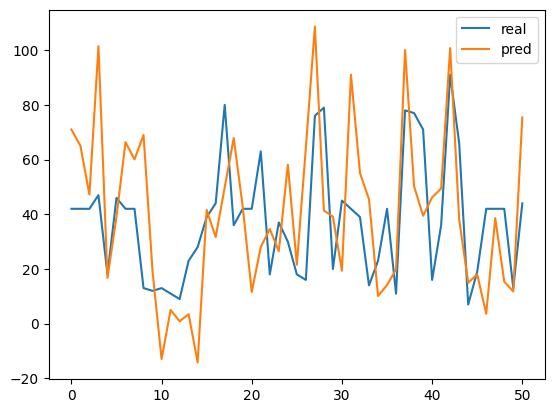

In [14]:
X_test = torch.from_numpy(X_test)

plt.plot(y_test, label='real')
plt.plot(model(X_test).detach().numpy(), label='pred')
plt.legend()
plt.show()